# Net generation and investigation of 2d net-generated cluster 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import ceil

## Grid generation with and without shell

In [131]:
def generate_filled_grid(n, fill_prob):
    nodes = []
    stack = [(int(n // 2), int(n // 2))]

    while stack:
        new_stack = []

        for node in stack:
            if random() < fill_prob:
                nodes.append(node)

                if all([random() < fill_prob, 
                        node[0] + 1 < n, 
                        not (node
                        [0] + 1, node[1]) in nodes]):
                    new_stack.append((node[0] + 1, node[1]))

                if all([random() < fill_prob, 
                        node[1] + 1 < n, 
                        not (node[0], node[1] + 1) in nodes]):
                    new_stack.append((node[0], node[1] + 1))

                if all([random() < fill_prob, 
                        node[0] - 1 > 0, 
                        not (node[0] - 1, node[1]) in nodes]):
                    new_stack.append((node[0] - 1, node[1]))

                if all([random() < fill_prob, 
                        node[1] - 1 > 0, 
                        not (node[0], node[1] - 1) in nodes]):
                    new_stack.append((node[0], node[1] - 1))

        stack[:] = new_stack

    grid = np.zeros((n, n))

    for node in nodes:
        grid[node[0], node[1]] = 1

    return grid

def generate_filled_grid_with_shell(n, node_prob, shell_prob):
    nodes = []
    shells = []

    n_with_shell = n * 3

    mid = ceil(n_with_shell / 2.) - 1
    mid -= 1 if n % 2 == 0 else 0

    stack = [(mid, mid)]

    while stack:
        new_stack = []

        for node in stack:
            if random() < node_prob:
                nodes.append(node)

                if random() < shell_prob:
                    shells.append((node[0] + 1, node[1]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[0] + 3 < n_with_shell, 
                            not (node[0] + 3, node[1]) in nodes]):
                        shells.append((node[0] + 2, node[1]))
                        new_stack.append((node[0] + 3, node[1]))

                if random() < shell_prob:
                    shells.append((node[0], node[1] + 1))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[1] + 3 < n_with_shell, 
                            not (node[0], node[1] + 3) in nodes]):
                        shells.append((node[0], node[1] + 2))
                        new_stack.append((node[0], node[1] + 3))

                if random() < shell_prob:
                    shells.append((node[0] - 1, node[1]))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[0] - 3 > 0, 
                            not (node[0] - 3, node[1]) in nodes]):
                        shells.append((node[0] - 2, node[1]))
                        new_stack.append((node[0] - 3, node[1]))

                if random() < shell_prob:
                    shells.append((node[0], node[1] - 1))
                    if all([random() < shell_prob,
                            random() < node_prob, 
                            node[1] - 3 > 0, 
                            not (node[0], node[1] - 3) in nodes]):
                        shells.append((node[0], node[1] - 2))
                        new_stack.append((node[0], node[1] - 3))

        stack[:] = new_stack

    grid = np.zeros((n_with_shell, n_with_shell))

    for node in nodes:
        grid[node[0], node[1]] = 1

    for shell in shells:
        grid[shell[0], shell[1]] = 0.5
        
    return grid

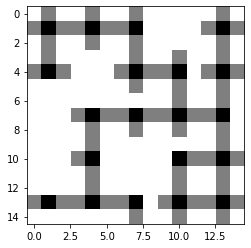

In [142]:
grid = generate_filled_grid_with_shell(5, 1, 0.6)
plt.imshow(grid, vmin=0, vmax=1, cmap='binary')
plt.show()

## Depending on filled grid generate clusters map

In [ ]:
def fill_marker_grid(arr):
    n = (arr[0].size) // 3

    markers = np.zeros(shape=(n, n))
    last_cluster_marker = 0

    size_with_shells = n * 3
    
    if arr[1, 1] == 1:
        last_cluster_marker += 1
        markers[0, 0] = last_cluster_marker

    for j in range(4, size_with_shells, 3):
        if arr[1, j] == 1:
            i_m = 0
            j_m = int(j // 3)
            if arr[1, j - 1] == 1 and arr[1, j - 2] == 1:
                markers[i_m, j_m] = markers[i_m, j_m - 1] 
            else: 
                last_cluster_marker += 1
                markers[i_m, j_m] = last_cluster_marker
            
    for i in range(4, size_with_shells, 3):
        if arr[i, 1] == 1:
            i_m = int(i // 3)
            j_m = 0
            if arr[i - 1, 1] == 1 and arr[i - 2, 1] == 1:
                markers[i_m, j_m] = markers[i_m - 1, 0]
            else:
                last_cluster_marker += 1
                markers[i_m, j_m] = last_cluster_marker

        for j in range(4, size_with_shells, 3):
            if arr[i, j] == 1:
                i_m = int(i // 3)
                j_m = int(j // 3)
                if arr[i - 1, j] == arr[i - 2, j] == arr[i, j - 1] == arr[i, j - 2] == 1:
                    new_m = markers[i_m - 1, j_m]
                    markers[i_m, j_m] = markers[i_m - 1, j_m]
                    markers = np.where(markers == markers[i_m, j_m - 1],  new_m, markers[i_m, j_m])
                elif arr[i - 1, j] == arr[i - 2, j] == 1:
                    markers[i_m, j_m] = markers[i_m - 1, j_m]
                elif arr[i, j - 1] == arr[i, j - 2] == 1:
                    markers[i_m, j_m] = markers[i_m, j_m - 1]
                else:
                    last_cluster_marker += 1
                    markers[i_m, j_m] = last_cluster_marker
    
    return markers

## Additional functions

In [ ]:
def display_array(arr, figure, vmin=None, vmax=None):
    plt.figure(figure)
    plt.imshow(arr, vmin=None, vmax=None, cmap='binary')

## Demonstration
### Without shell

In [ ]:
filled_grid = generate_filled_grid(3, 0.6)
print(filled_grid)

In [ ]:
display_array(filled_grid, "init")

### With shell

In [ ]:
filled_grid_with_shell = generate_filled_grid_with_shell(n=3, node_prob=0.6, shell_prob=0.6)
marker_grid = fill_marker_grid(filled_grid_with_shell)
print(filled_grid_with_shell)
print(marker_grid)

In [ ]:
display_array(filled_grid_with_shell, "with_shell")
display_array(marker_grid, "markers")